### Common statistical tests in machine learning
- **Exploratory Data Analysis (EDA)**
- Test for normality (**shapiro test**)
- Test for Outliers (**Tietjen-Moore**)
- Test for correlation (**t-test**)
- Test of homogeneity (for categorical variables) (**chi-squared test**)
- Test for equality of distribution (**ks-test**)
- ANOVA/ F-test
- How to test whether a time series data is stationary? (**ADF test**)
- How to check autocorrelation among the values of a time series? (**Durbin-watson test**)

- Test for normality (**shapiro test**)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats

In [13]:
data = stats.norm.rvs(loc=2.5, scale=2, size=100)
stat, p = shapiro(data)
print('stat : {}, p :{}'.format(stat, p))

stat : 0.9816452860832214, p :0.17821431159973145


In [15]:
prob = 0.95
alpha = 1.0 - prob

# interpret p-value
if p <= alpha:
    print('not normal distribution (reject H0)')
else:
    print('normal distribution (fail to reject H0)')

normal distribution (fail to reject H0)


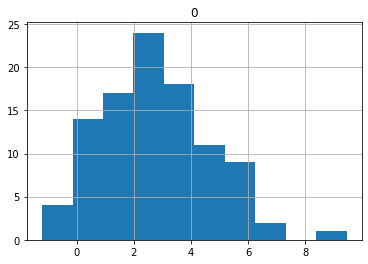

In [17]:
# we can check with histogram as well
pd.DataFrame(data).hist()
plt.show()

- Test for Outliers (**Tietjen-Moore**)

In [19]:
import scikit_posthocs
x = np.array([-1.40, -0.44, -0.30, -0.24, -0.22, -0.13, -0.05, 0.06, 0.10, 0.18, 0.20, 0.39, 0.48, 0.63, 1.01])
scikit_posthocs.outliers_tietjen(x, 2)

array([-0.44, -0.3 , -0.24, -0.22, -0.13, -0.05,  0.06,  0.1 ,  0.18,
        0.2 ,  0.39,  0.48,  0.63])

- **outliers_tietjen test will provide filtered array from outliers**

- **Pearson’s Chi-Squared Test**
- The Pearson’s chi-squared statistical hypothesis is an example of a **test for independence between categorical variables**.
- h0 : independent
- hal : dependent
- If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
- If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

In [2]:
data = pd.DataFrame({'sex':['M','F','M','F','M','M','F','M'], 
              'Interest':['art', 'math','art','math','science','math','science','art']})
data

,sex,Interest
0,M,art
1,F,math
2,M,art
3,F,math
4,M,science
5,M,math
6,F,science
7,M,art


In [3]:
table = pd.crosstab(data['sex'], data['Interest'])
table

Interest,art,math,science
sex,,,
F,0,2,1
M,3,1,1


In [4]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [5]:
stat, p, dof, expected = chi2_contingency(table)

In [6]:
prob = 0.95
alpha = 1.0 - prob
print('p value : {}, dof (rows-1 * col -1) : {} '.format(p, dof))
# interpret p-value

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

p value : 0.22066465874200497, dof (rows-1 * col -1) : 2 
Independent (fail to reject H0)


- **T-test**
- The t test (also called Student’s T Test) compares two averages (means)of the sample and tells you if they are different from each other. The t test also tells you how significant the differences are
- A large t-score tells you that the groups are different.
- A small t-score tells you that the groups are similar.
- **There are two main versions of Student’s t-test:**

- **Independent Samples**. The case where the two samples are unrelated.
- **Dependent Samples**. The case where the samples are related, such as repeated measures on the same population. Also called a paired test.


In [39]:
# generate two independent samples
# ho : two samples have same mean
# hal : two samples don't have same mean
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

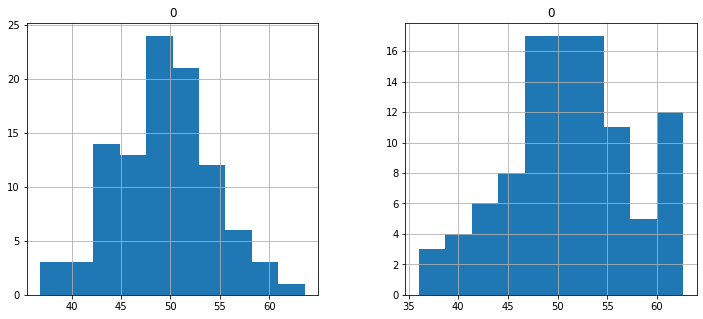

In [43]:
f,ax = plt.subplots(1,2, figsize = (12,5)) 
pd.DataFrame(data1).hist(ax = ax[0])
pd.DataFrame(data2).hist(ax= ax[1])
plt.show()

In [45]:
from scipy.stats import ttest_ind

In [47]:
stat, p = ttest_ind(data1, data2)
print('stat: {}, p : {}'.format(stat, p))

stat: -2.315270045066667, p : 0.02162277192490012


In [48]:
prob = 0.95
alpha = 1-prob
if p<= alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

reject null hypothesis


In [49]:
# for dependent data (just pretend the data we have is dependent)
from scipy.stats import ttest_rel

In [50]:
stat, p = ttest_rel(data1, data2)
print('stat: {}, p : {}'.format(stat, p))

stat: -2.2166163795356804, p : 0.028938101559253054


In [51]:
prob = 0.95
alpha = 1-prob
if p<= alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

reject null hypothesis


- **F-test/ anova**
- an F-test can compare the means of various groups and determine if they are equal by looking at their variances.
- **F-statistic = variance between groups / variance within groups**

In [55]:
from sklearn import datasets
iris = datasets.load_iris()

In [62]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [67]:
df['flower'] = df['target'].apply(lambda x :'setosa' if x == 0.0 else 'versicolor' if x == 1.0 else 'virginica')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [68]:
# Get names of each feature for later
names = iris.get('target_names')
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [70]:
# ho: all 3 groups has same mean
# hal: all 3 groups don't have same mean
df.groupby('flower')['sepal width (cm)'].mean()

flower
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal width (cm), dtype: float64

In [71]:
from scipy.stats import f_oneway

In [77]:
stat, p = f_oneway(df[df['flower']== 'setosa']['sepal width (cm)'],
        df[df['flower']== 'versicolor']['sepal width (cm)'],
        df[df['flower']== 'virginica']['sepal width (cm)'])
print('stat : {}, p : {}'.format(stat, p))

stat : 49.160040089612075, p : 4.492017133309115e-17


In [78]:
prob = 0.95
alpha = 1-prob
if p<= alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

reject null hypothesis


- **How to check if a given data sets follow a particular distribution? / uniformity**  
- Sometimes in data analysis we require checking if the data follows a particular distribution. Even we may want to check if two samples follow the same distribution. In such cases we use **Kolmogorov-Smirnov (KS) test**. We often use KS test to check for goodness of fit of a regression model.

In [80]:
from scipy.stats import kstest
x = np.linspace(-25, 17, 6)
stat, p = kstest(x, 'norm')
print('stat : {}, p : {}'.format(stat, p))

stat : 0.4999999999999999, p : 0.06558641975308652


In [86]:
stat, p = kstest(np.linspace(1,100,20), 'norm')
print('stat : {}, p : {}'.format(stat, p))

stat : 0.9499999997359628, p : 1.9073488342568841e-26


-  **How to test whether a time series data is stationary?**

In [25]:
from statsmodels.tsa.stattools import adfuller
X = [15, 20, 21, 20, 21, 30, 33, 45, 56]
stat, p, _,_,_,_ = adfuller(X)
print('stat : {}, p: {}'.format(stat, p))

stat : 1.9764571136272384, p: 0.9986415675949798


In [26]:
prob = 0.95
alpha = 1-prob
if p<= alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

fail to reject null hypothesis


- **How to check autocorrelation among the values of a time series?**
- **Durbin watson** stat run between 0 and 4. 
- **if stat value < 2 --> positive auto correlation**
- **if stat value > 2 --> negative auto correlation**

In [27]:
from statsmodels.stats.stattools import durbin_watson
X = [15, 20, 21, 20, 21, 30, 33, 45, 56]
result = durbin_watson(X)
print(result)

0.042287733245003865
